
Programming Fundamentals
============================



This notebook deals with the optimization of algorithms using algorithm complexity theory ($\Theta$, $\mathcal{O}$), profiling tools (%time and %lprun) and multiprocess and multithread implementations.

In [1]:
# Checks a cell for pep8 compliance
%load_ext pycodestyle_magic
%pycodestyle_on

## Exercice 1

We will study the algorithmic complexity in relation to the execution time of the following code fragments. You will have to calculate $\Theta$ or $\mathcal{O}$ depending on the exercise. Justify your answers.

**A section** 

Indicate the algorithmic complexity $\Theta$ in relation to the execution time of the following code snippet. You can assume that all three parameters are always the same size.

In [ ]:
def foo(L, s, d):
    """
    Args:
        L (:obj:`list`): a list of integers.
        s (:obj:`list`): a list of integers.
        d (:obj:`dict`): a dictionary.
    """
    r = 0
    for k in d.keys():
        for i, j in zip(L, s):
            d[k] = i + j
            r = d[k] + 1
    return r

**Answer**

The code has a $\Theta$ complexity of (n <sup> 2 </sup>), since it executes the first loop (d) for each element of the central loop (L, s). Considering that the three parameters have the same size ($n$), the code will perform $n\cdot n$ iterations.


**B section**

Indicate the algorithmic complexity $\Theta$ in relation to the execution time of the following code snippet.

In [ ]:
def foo2(n):
    """
    Args:
        n (:obj:`int`): a positive integer.
    """
    r = 0
    d1 = n
    while d1 > 1:
        b = d1 % 2
        d1 = d1//2
        if b == 1:
            r += 1
    if d1 == 1:
        r += 1
    
    return r

**Answer**

The code has a complexity of $\Theta(\log{n})$, since the internal loop divides `d1` by two in each iteration, executing a total of log<sub>2</sub>n iterations.

**C section**

Indicate the algorithmic complexity $\mathcal{O}$ in relation to the execution time of the following code snippet. 

In [ ]:
def foo3(i):
    """
    Args:
        n (:obj:`int`): an integer value
    """
    r = 0
    if not i % 9:
        r -= 1
    else:
        while (i % 3 and i > 2):
            r += 1
            i = i//3
    return r

**Answer**

In this case, if our input $n$ is a multiple of 9, the algorithm will run in constant time since it will not enter inside the loop. However, if this is not the case, the entry number will be divided by 3 until we get a number smaller than 3. This process will be performed $log_3(n)$ times for a $n$ input (not multiple of 9).


## Exercice 2

In this exercise you will analyze a piece of code in order to detect inefficiencies. Once done, improve the performance of the fragment.

1. Using *profiling* tools, analyze the following inefficient code snippet and find out where the bottleneck is. Explain the inefficiencies you have detected relating them to the results obtained in *profiling*.

2. Improve the code to reduce the runtime.

In [1]:
%load_ext line_profiler

In [2]:
def reverse_list_while(L):
    """
     Reverse elements of a list
     
     Args:
         L (:obj: `list`) : list
     Returns:
         (:obj: `int`) : reverse list
    """
    i = len(L)
    L1 = []
    while(len(L1) != len(L)):
        if(i != 1):
            L1.append(L[i-1])
            i = i-1
        else:
            L1.append(L[0])
    return L1

In [3]:
L = list(range(1000000))
%time reverse_list_while(L)

CPU times: user 715 ms, sys: 27.7 ms, total: 743 ms
Wall time: 744 ms


[999999,
 999998,
 999997,
 999996,
 999995,
 999994,
 999993,
 999992,
 999991,
 999990,
 999989,
 999988,
 999987,
 999986,
 999985,
 999984,
 999983,
 999982,
 999981,
 999980,
 999979,
 999978,
 999977,
 999976,
 999975,
 999974,
 999973,
 999972,
 999971,
 999970,
 999969,
 999968,
 999967,
 999966,
 999965,
 999964,
 999963,
 999962,
 999961,
 999960,
 999959,
 999958,
 999957,
 999956,
 999955,
 999954,
 999953,
 999952,
 999951,
 999950,
 999949,
 999948,
 999947,
 999946,
 999945,
 999944,
 999943,
 999942,
 999941,
 999940,
 999939,
 999938,
 999937,
 999936,
 999935,
 999934,
 999933,
 999932,
 999931,
 999930,
 999929,
 999928,
 999927,
 999926,
 999925,
 999924,
 999923,
 999922,
 999921,
 999920,
 999919,
 999918,
 999917,
 999916,
 999915,
 999914,
 999913,
 999912,
 999911,
 999910,
 999909,
 999908,
 999907,
 999906,
 999905,
 999904,
 999903,
 999902,
 999901,
 999900,
 999899,
 999898,
 999897,
 999896,
 999895,
 999894,
 999893,
 999892,
 999891,
 999890,
 999889,
 

**Answer**

Using the %lprun profiling tool, we can see how the original function spends almost 100% of the execution time on the while loop. Although each line's *Per Hit time* values are low, the repetition of them for each number, causes that the *%Time* values of these lines almost reach the 100% of the runtime. 

To improve this code by changing things as little as possible, it can removed the if and else clauses from the loop to avoid unnecessary steps, prevent the program from calculating the lists' sizes many times (just compute the original list size) and instead of comparing the list size with "!=" better compare with "<". These changes improve execution time by 45%. 

In [4]:
def reverse_list_while(L):
    """
     Reverse elements of a list
     
     Args:
         L (:obj: `list`) : list
     Returns:
         (:obj: `int`) : reverse list
    """
    i = len(L)
    a = 1
    L1 = []
    # Append last element of the original list
    L1.append(L[-1])
    # Append the rest of elements
    while(a < i):
        a+=1
        L1.append(L[-a])
    return L1

In [5]:
L = list(range(1000000))
%time reverse_list_while(L)

CPU times: user 388 ms, sys: 112 µs, total: 389 ms
Wall time: 391 ms


[999999,
 999998,
 999997,
 999996,
 999995,
 999994,
 999993,
 999992,
 999991,
 999990,
 999989,
 999988,
 999987,
 999986,
 999985,
 999984,
 999983,
 999982,
 999981,
 999980,
 999979,
 999978,
 999977,
 999976,
 999975,
 999974,
 999973,
 999972,
 999971,
 999970,
 999969,
 999968,
 999967,
 999966,
 999965,
 999964,
 999963,
 999962,
 999961,
 999960,
 999959,
 999958,
 999957,
 999956,
 999955,
 999954,
 999953,
 999952,
 999951,
 999950,
 999949,
 999948,
 999947,
 999946,
 999945,
 999944,
 999943,
 999942,
 999941,
 999940,
 999939,
 999938,
 999937,
 999936,
 999935,
 999934,
 999933,
 999932,
 999931,
 999930,
 999929,
 999928,
 999927,
 999926,
 999925,
 999924,
 999923,
 999922,
 999921,
 999920,
 999919,
 999918,
 999917,
 999916,
 999915,
 999914,
 999913,
 999912,
 999911,
 999910,
 999909,
 999908,
 999907,
 999906,
 999905,
 999904,
 999903,
 999902,
 999901,
 999900,
 999899,
 999898,
 999897,
 999896,
 999895,
 999894,
 999893,
 999892,
 999891,
 999890,
 999889,
 

If you want to make deeper changes, it is possible to use the original list itself to exchange the values from one half to the other:

In [6]:
def reverse_list_while(L):
    """
     Reverse elements of a list
     
     Args:
         L (:obj: `list`) : list
     Returns:
         (:obj: `int`) : reverse list
    """
    half_size_list = len(L)//2
    for i in range(half_size_list):
        begining_value, final_value = L[-i-1],L[i]        
        L[i],L[-i-1] = begining_value, final_value
        
    return L

In [7]:
L = list(range(1000000))
%time reverse_list_while(L)

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 11.9 ms


[999999,
 999998,
 999997,
 999996,
 999995,
 999994,
 999993,
 999992,
 999991,
 999990,
 999989,
 999988,
 999987,
 999986,
 999985,
 999984,
 999983,
 999982,
 999981,
 999980,
 999979,
 999978,
 999977,
 999976,
 999975,
 999974,
 999973,
 999972,
 999971,
 999970,
 999969,
 999968,
 999967,
 999966,
 999965,
 999964,
 999963,
 999962,
 999961,
 999960,
 999959,
 999958,
 999957,
 999956,
 999955,
 999954,
 999953,
 999952,
 999951,
 999950,
 999949,
 999948,
 999947,
 999946,
 999945,
 999944,
 999943,
 999942,
 999941,
 999940,
 999939,
 999938,
 999937,
 999936,
 999935,
 999934,
 999933,
 999932,
 999931,
 999930,
 999929,
 999928,
 999927,
 999926,
 999925,
 999924,
 999923,
 999922,
 999921,
 999920,
 999919,
 999918,
 999917,
 999916,
 999915,
 999914,
 999913,
 999912,
 999911,
 999910,
 999909,
 999908,
 999907,
 999906,
 999905,
 999904,
 999903,
 999902,
 999901,
 999900,
 999899,
 999898,
 999897,
 999896,
 999895,
 999894,
 999893,
 999892,
 999891,
 999890,
 999889,
 

And even though this modifications reduces the runtime by 58%, the fastest method is using the list slicing, which decreases the time by 99%.

In [8]:
def reverse_list_while(L):
    """
     Reverse elements of a list
     
     Args:
         L (:obj: `list`) : list
     Returns:
         (:obj: `int`) : reverse list
    """
    L = L[::-1]
        
    return L

In [9]:
L = list(range(1000000))
%time reverse_list_while(L)

CPU times: user 10.5 ms, sys: 0 ns, total: 10.5 ms
Wall time: 10.3 ms


[999999,
 999998,
 999997,
 999996,
 999995,
 999994,
 999993,
 999992,
 999991,
 999990,
 999989,
 999988,
 999987,
 999986,
 999985,
 999984,
 999983,
 999982,
 999981,
 999980,
 999979,
 999978,
 999977,
 999976,
 999975,
 999974,
 999973,
 999972,
 999971,
 999970,
 999969,
 999968,
 999967,
 999966,
 999965,
 999964,
 999963,
 999962,
 999961,
 999960,
 999959,
 999958,
 999957,
 999956,
 999955,
 999954,
 999953,
 999952,
 999951,
 999950,
 999949,
 999948,
 999947,
 999946,
 999945,
 999944,
 999943,
 999942,
 999941,
 999940,
 999939,
 999938,
 999937,
 999936,
 999935,
 999934,
 999933,
 999932,
 999931,
 999930,
 999929,
 999928,
 999927,
 999926,
 999925,
 999924,
 999923,
 999922,
 999921,
 999920,
 999919,
 999918,
 999917,
 999916,
 999915,
 999914,
 999913,
 999912,
 999911,
 999910,
 999909,
 999908,
 999907,
 999906,
 999905,
 999904,
 999903,
 999902,
 999901,
 999900,
 999899,
 999898,
 999897,
 999896,
 999895,
 999894,
 999893,
 999892,
 999891,
 999890,
 999889,
 

## Exercice 3


In this exercise you will analyze a piece of code in order to detect inefficiencies. Once done, improve the performance of the fragment.

1. Using *profiling* tools, analyze the following inefficient code snippet and find out where the bottleneck is. Explain the inefficiencies you have detected relating them to the results obtained in *profiling*.

2. Improve the code to reduce the runtime.


In [10]:
from random import randint


def count_appearence(iters, n):
    """
     Given a number n, generates a random list of 'iters'
     number of elements between [-10*n,10*n] and count how many times
     our input n appears in the random list.

     Args:
         iters (:obj: `int`) : integer, number of random elements to generate
         n (:obj: `int`) : integer, number to count appearences
     Returns:
         (:obj: `int`) : integer, number of times that n
         appears in the generated random list.
    """
    c = 0
    L = []
    for i in range(iters):
        num = randint(-10*n, 10*n)
        if num == n:
            c += 1
    return c


iters, n = int(1e6), int(1e2)

In [11]:
%time count_appearence(iters, n)

CPU times: user 2.14 s, sys: 15.4 ms, total: 2.16 s
Wall time: 2.16 s


511

**Answer**

In this case, almost 100% of the execution time is used in the for loop and its content. Within the for loop, time is not evenly distributed, as the generation of random numbers consumes 81% of the time, with each Hit being around 11 microseconds, 10 more than the other lines. For this reason in the following solution it is used a faster alternative to the generation of random numbers.

In [12]:
import numpy as np
from random import randint
from multiprocessing import Process, Value


def count_appearence(iters, n):
    """
     Given a number n, generates a random list of 'iters'
     number of elements between [-10*n,10*n] and count how many times
     our input n appears in the random list.

     Args:
         iters (:obj: `int`) : integer, number of random elements to generate
         n (:obj: `int`) : integer, number to count appearences
     Returns:
         (:obj: `int`) : integer, number of times that n
         appears in the generated random list.
    """

    random_nums = np.random.randint(low=-10*n, high=10*n, size=(iters))
    c = sum([1 for i in random_nums if n == i])

    return c

In [13]:
%time count_appearence(iters, n)

CPU times: user 861 ms, sys: 3.66 ms, total: 865 ms
Wall time: 870 ms


501

In the previous cell, the `numpy.randint` method has been used to generate all random numbers at the same time. Once generated, the function only has to iterate through the list to count how many times the number we want to find appears. With this change, the execution time is reduced by 60%. However there is still room to improvement. It is still possible to use several processes: 

In [14]:
import numpy as np


def count_appearence(iters, n):
    """
     Given a number n, generates a random list of 'iters'
     number of elements between [-10*n,10*n] and count how many times
     our input n appears in the random list.

     Args:
         iters (:obj: `int`) : integer, number of random elements to generate
         n (:obj: `int`) : integer, number to count appearences
     Returns:
         (:obj: `int`) : integer, number of times that n
         appears in the generated random list.
    """
    global count
    random_nums = np.random.randint(low=-10*n, high=10*n, size=(iters))
    c = sum([1 for i in random_nums if n == i])
    with count.get_lock():
        count.value += c

In [15]:
from multiprocessing import Process, Value


def count_appearence_multiprocess(iters, n):

    residu = iters % 4
    iters = (iters-residu)//4

    processes = []
    for i in [iters, iters, iters, iters+residu]:
        p = Process(target=count_appearence, args=(i, n))
        processes.append(p)
        p.start()

    for p in processes:
        p.join()

    return count.value


count = Value('i', 0)
iters, n = int(1e6), int(1e2)

In [16]:
%time count_appearence_multiprocess(iters, n)

CPU times: user 8.08 ms, sys: 20.3 ms, total: 28.4 ms
Wall time: 279 ms


480

Using 4 processes to this task, the runtime is reduced by an 87% (from 2.16 seconds to 0.279 seconds).



## Exercice 4

In a job offer of the Uber company as a data analyst, we are asked to analyze the distribution of the use of its service in New York City. To do this, they have provided us with a relatively large data set with daily data on the use of their services between April and September 2014. In this context, **service** means an entry of the data set.

We are asked to:

**a)** Find the total count of services grouped by base, and show the results 
using a bar chart where the `x` axis represents the base, and the `y` axis represents the number of services.
 
**b)** Find the percentage of services during the weekend (Saturday and Sunday) with respect to the total of weekly services grouped by base and show the results using a bar chart where the `x` axis represents the base, and the `y` axis represents the percentage.
 
*Clarification*: the percentage will be calculated on the total number of weekly services of each base.

1. Implement a **sequential solution** to the problem posed in the statement.
2. Justify whether you can reduce runtime by using either multiple *threads* or multiple processes.
3. Implement a *multiprocess* **or** a *multithreaded* solution that reduces the runtime of each problem's sequential solution.
4. Comment (in a couple of lines) on the obtained graphs.

## A section: 
### Sequential

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os


def all_csv_graph(folder):
    """ Scans a directory to find the uber services files in New York for
    each month. Sums all the file's services and group them by bases to plot
    the total of services for each base.

    Parameters:
        folder(string): directory where the files are

    Returns: nothing.
    """
    bases_nums = []
    # The files of the directory are not filtered because I have
    # the certainty that there are only these files
    with os.scandir(folder) as dir_list:
        for entry in dir_list:
            df = pd.read_csv(folder+entry.name)
            df_group = df.groupby('Base').size().reset_index()
            # If bases_nums list is empty assign results from first file
            if not len(bases_nums):
                bases_nums = df_group.iloc[:, 1]
                bases = df_group.iloc[:, 0]
            # If not empty concat with the other files numbers
            else:
                bases_nums = pd.concat([bases_nums, df_group.iloc[:, 1]],
                                       axis=1, sort=False)
    # Sum all the rows to have the total of each base
    bases_nums['sum'] = bases_nums.sum(axis=1)

    plt.bar(bases, bases_nums['sum'])
    plt.xlabel('Bases')
    plt.ylabel('Total Services')


folder = 'data/'

CPU times: user 5.36 s, sys: 255 ms, total: 5.62 s
Wall time: 5.64 s


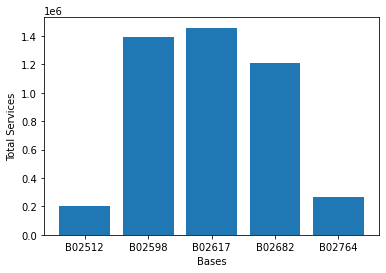

In [18]:
%time all_csv_graph(folder)

#### Comment on the graph:

B02512 and B02764 have much less services than the other bases during the included months. While these bases' services are around 200.000, the others are around 1.300.000. 

In [19]:
# %lprun -f all_csv_graph all_csv_graph(folder)

#### Multithread Justification:

In the previous function, 87% of the time is used in the pd.read_csv() method, which uses the cpu and saves information into memory. Therefore, while the computer is loading the data the cpu can do other tasks, in other words, a multi-threaded method can be applied to reduce the time.

### Multithread

In [20]:
from threading import Thread, Lock


def get_files(folder):
    """ Scans a directoy with all the Uber's .csv files to create a list with
    the path of every file.

    Parameters:
        folder(string): directory where the files are

    Returns:
        files(list): returns a list with all files' paths.
    """
    # The files of the directory are not filtered because I have
    # the certainty that there are only these files
    files = []
    with os.scandir(folder) as dir_list:
        for file in dir_list:
            files.append(folder+file.name)

    return files

In [21]:
def add_nums_from_df(file, lock, num):
    """ Creates a dataframe from the first .csv file. Once created groups
    the data by base and appends it to the global list bases_nums. This
    function also assings the names of the bases to the global list bases.

    Parameters:
        file(string): path to the .csv file
        lock(Lock): allows to lock the global variable bases_nums
        num(int): integer used to store only once the bases names

    Returns: nothing.
    """
    df = pd.read_csv(file)
    df_group = df.groupby('Base').size().reset_index()

    global bases_nums, bases
    # Lock bases_nums to concat services from each base
    lock.acquire()
    bases_nums = pd.concat([bases_nums, df_group.iloc[:, 1]],
                           axis=1, sort=False)
    lock.release()
    # To store only once the bases names is used an if clause with num
    if num == 0:
        bases = df_group.iloc[:, 0]

In [22]:
def plot_with_threads(folder):
    """ Creates a plot from all the .csv files from a directory representing
    the total services of each base. To do it, the function uses multiple
    threads.

    Parameters:
        folder(string): directory where the files are

    Returns: nothing.
    """
    global bases_nums, bases
    bases_nums = pd.DataFrame([])

    threads = []
    lock = Lock()

    files = get_files(folder)

    for num, file in enumerate(files):
        thread = Thread(target=add_nums_from_df, args=(file, lock, num))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    # Sum all the rows to have the total of each base
    bases_nums['sum'] = bases_nums.sum(axis=1)

    plt.bar(bases, bases_nums['sum'])
    plt.xlabel('Bases')
    plt.ylabel('Total Services')

In [23]:
bases = []
bases_nums = []
folder = ('data/')

CPU times: user 5.81 s, sys: 736 ms, total: 6.54 s
Wall time: 2.88 s


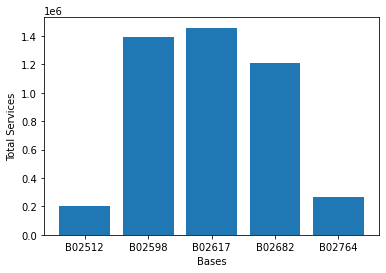

In [24]:
%time plot_with_threads(folder)

## B section
### Sequential

In [25]:
import datetime


def extract_grouped_base_day(file):
    """ Creates from a .csv file a grouped dataframe by Base's name and Day
    type(weekend or not) which contains the count of service's of each group.

    Parameters:
        file(string): path where the .csv file is

    Returns:
        df_grouped(dataframe): contains the services grouped by Base and Day
    """
    df = pd.read_csv(file)
    weekday = []
    for i in df.iloc[:, 0]:
        # Strips the date to create a new list with values "Weekend" or
        # "Working day"
        date = datetime.datetime.strptime(i, "%m/%d/%Y %H:%M:%S").strftime("%A")
        if (date == "Saturday") or (date == "Sunday"):
            weekday.append("Weekend")
        else:
            weekday.append("Working Day")

    # Appends the list to the original dataframe
    df_concat = pd.concat([df, pd.DataFrame(weekday)], axis=1, sort=False)

    # Change the name of the new column
    names = df_concat.columns.tolist()
    names[names.index(0)] = 'Day'
    df_concat.columns = names

    # The dataframe is grouped by "Base" and "Day"
    df_grouped = df_concat.groupby(['Base', 'Day']).size()

    return df_grouped

In [26]:
def main_function(folder):
    """ Creates a plot from all the .csv files from a directory representing
    the % of services done on the weekend for each base.

    Parameters:
        folder(string): directory where the .csv files are

    Returns: nothing
    """

    with os.scandir(folder) as dir_list:
        for num, entry in enumerate(dir_list):
            print('File:', entry.name)
            # Creates the df_grouped dataframe using the first file
            if num == 0:
                df_grouped = extract_grouped_base_day(folder+entry.name)
            # Appends the info of the rest of the files to df_grouped
            else:
                df_temporal = extract_grouped_base_day(folder+entry.name)
                df_grouped = pd.concat([df_grouped, df_temporal], axis=1)
    # Sums each row, which contains the total of services of each base on
    # weekend or not weekend.
    df_grouped['sum'] = df_grouped.sum(axis=1)
    df_grouped = df_grouped.reset_index()

    # Computes the percentatges of services done on weekend of each base
    percentages = []
    bases = []
    for i in range(0, len(df_grouped), 2):
        percentage = df_grouped['sum'][i] / (
            df_grouped['sum'][i]+df_grouped['sum'][i+1])*100
        percentages.append(percentage)
        # Selects the bases' names.
        bases.append(df_grouped['Base'][i])

    plt.bar(bases, percentages)
    plt.xlabel('Bases')
    plt.ylabel('% of Services on Weekend')

File: uber-raw-data-aug14.csv
File: uber-raw-data-jun14.csv
File: uber-raw-data-jul14.csv
File: uber-raw-data-sep14.csv
File: uber-raw-data-may14.csv
File: uber-raw-data-apr14.csv
CPU times: user 2min 3s, sys: 408 ms, total: 2min 4s
Wall time: 2min 4s


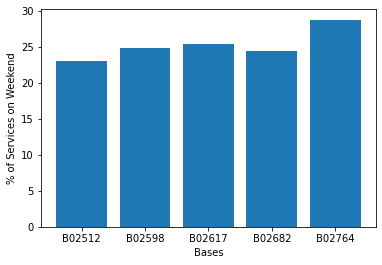

In [27]:
%time main_function(folder)

#### Comment on the graph:

Contrary to the previous graph, this time all the bases behave in a similar way, having approximately 25% of the services in the weekend. Considering the 7 days of the week, we would expect to have around 28% of the services in this period, however only the last base matches this behaviour. Therefore, the services of these bases could be more associated with day-to-day needs, such as going to work.

In [28]:
# %lprun -f main_function main_function(folder)

#### Multiprocess Justification:

In this section, I have chosen to implement a multiprocess implementation. This could be a good solution because each folder's file needs to go through the same calculations. Thus, using parallel procedures shoud reduce the runtime.

The bast majority of time is consumed in the transformation of the date column into a datetime object, representing 97% of the time. As it is a highly demanding cpu procedure, if several processes are used the time should be reduced.

### Multiprocess

In [29]:
from multiprocessing import Process, Array
import ctypes


def extract_grouped_base_day(file, index):
    """ Creates from a .csv file a grouped dataframe by Base's name and Day
    type(weekend or not), which contains the count of service's of each group.
    To create the Day column the date is striped.

    In addittion the function assignates the names of the bases to the bases
    array.

    Parameters:
        file(string): path to a .csv file
        index(integer): it indicates the number of the process that executes
            the function. It is used to perform only once the assignation of
            the bases to the array.

    Returns:
        df_grouped(dataframe): column with the count of each group
    """
    df = pd.read_csv(file)
    weekday = []
    for i in df.iloc[:, 0]:
        # Strips the date to create a new list with values "Weekend" or
        # "Working day"
        date = datetime.datetime.strptime(i, "%m/%d/%Y %H:%M:%S").strftime("%A")
        if (date == "Saturday") or (date == "Sunday"):
            weekday.append("Weekend")
        else:
            weekday.append("Working Day")

    # Appends list to the original dataframe
    df_concat = pd.concat([df, pd.DataFrame(weekday)], axis=1, sort=False)

    # Changes name of the new column
    names = df_concat.columns.tolist()
    names[names.index(0)] = 'Day'
    df_concat.columns = names

    # The dataframe is grouped by "Base" and "Day"
    df_grouped = df_concat.groupby(['Base', 'Day']).size()

    # Assignates the name of the differents bases to the bases Array, but
    # only the number, latter the letter will be added.
    if index == 0:
        for num, base in enumerate(df['Base'].unique()):
            bases_array[num] = int(base[1:])

    return df_grouped

In [30]:
def join_grouped(file, index):
    """ Extracts of each file a dataframe with the counts of services for
    each base and type of day and stores the counts on a shared array between
    processes.

    Parameters:
        file(string): path to a .csv file
        index(integer): it indicates the number of the process that executes
            the function.

    Returns:
        df_grouped(dataframe): column with the count of each group
    """
    # Extracts the counts of one file
    df_grouped = extract_grouped_base_day(file, index)

    # Locks the shared array and appends the counts of the file. Index
    # parameter is used to append in the correct order
    with grouped_list.get_lock():
        for num, i in enumerate(df_grouped):
            if index == 0:
                grouped_list[num] = i
            else:
                grouped_list[(index*10)+num] = i
        print('File:', file)

In [31]:
def main_processes_function(folder):
    """ Creates a plot from all the .csv files from a directory representing
    the % of services done on the weekend for each base using several
    processes.

    Parameters:
        folder(string): directory where the .csv files are

    Returns: nothing
    """
    files = get_files(folder)

    # Create and join the processes
    processes = []
    for index, file in enumerate(files):
        process = Process(target=join_grouped, args=(file, index))
        processes.append(process)
        process.start()
    for process in processes:
        process.join()

    # Stores the values of the shared array in columns using a new dataframe
    for i in range(len(files)):
        if i == 0:
            df_final_grouped = pd.DataFrame(grouped_list[0:10])
        else:
            df_next = pd.DataFrame((grouped_list[(i*10)+0:(i*10)+10]))
            df_final_grouped = pd.concat([df_final_grouped, df_next], axis=1)

    # Sums each row, which contains the total of services of each base on
    # weekend or not weekend.
    df_final_grouped['sum'] = df_final_grouped.sum(axis=1)

    # Computes the percentatges of services done on weekend of each base
    percentages = []
    for i in range(0, len(df_final_grouped), 2):
        percentage = df_final_grouped['sum'][i] / (
            df_final_grouped['sum'][i]+df_final_grouped['sum'][i+1])*100
        percentages.append(percentage)

    # Appends the bases' names.
    bases_names = []
    for i in range(5):
        bases_names.append('B' + str(bases_array[i]))

    # Creates the plot
    plt.bar(bases_names, percentages)
    plt.xlabel('Bases')
    plt.ylabel('% of Services on Weekend')

In [34]:
# Shared processess resources
grouped_list = Array('i', 60)
bases_array = Array('i', 5)

folder = 'data/'

File: data/uber-raw-data-apr14.csv
File: data/uber-raw-data-jun14.csv
File: data/uber-raw-data-may14.csv
File: data/uber-raw-data-jul14.csv
File: data/uber-raw-data-aug14.csv
File: data/uber-raw-data-sep14.csv
CPU times: user 62.5 ms, sys: 80.1 ms, total: 143 ms
Wall time: 42.4 s


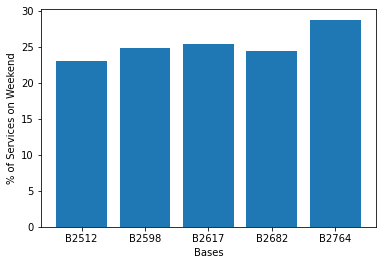

In [33]:
%time main_processes_function(folder)